## Homework 1
## 1. Recode Examples

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## image read and show
### matplotlib (RGB), opencv(BGR)

(500, 500, 3)


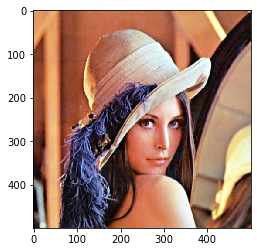

In [2]:
img_ori = plt.imread('lenna.jpg')  #读取图片 DO NOT USE cv.imread because of the mac.os system
print(img_ori.shape)  #查看维度
plt.imshow(img_ori)
plt.show()

(500, 500)


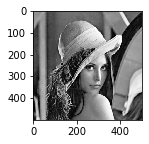

In [3]:
img_gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)  #2grayscale
print(img_gray.shape)
plt.figure(figsize=(2,2))
plt.imshow(img_gray,cmap='gray')
plt.show()  

In [4]:
## my plot function
def my_show(img,size=(5,5)):
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.show()

## image crop

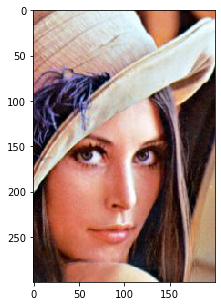

In [5]:
#my_show(img_ori[100:400,200:400],size=(5,5))
new = img_ori[100:400,200:400,:]
my_show(new)

## channel split

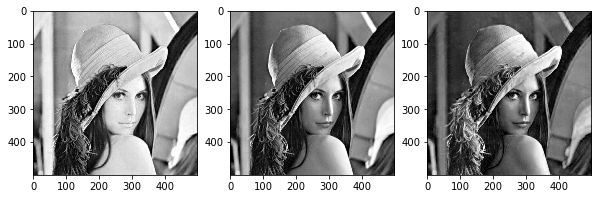

In [6]:
R,G,B = cv2.split(img_ori)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(R,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(G,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(B,cmap='gray')
plt.show()  

In [7]:
def img_cooler(img,b_increase,r_decrease):
    R,G,B = cv2.split(img)
    b_lim = 255 - b_increase
    B[B>b_lim] = 255
    B[B<=b_lim] = (B[B<=b_lim] + b_increase).astype(img.dtype)  #保存数据原有类型
    
    r_lim = r_decrease
    R[R<r_lim] = 0
    R[R>=r_lim] = (R[R>=r_lim] - r_decrease).astype(img.dtype)
    return cv2.merge((R,G,B))

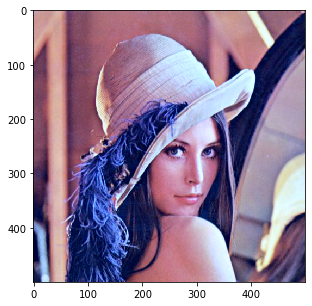

In [8]:
cooler_img = img_cooler(img_ori,50,20)
my_show(cooler_img)

## Gamma Change (illumination adjust)

In [9]:
def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0 / gamma
    table = []
    
    for i in range(256):
        table.append(((i/255.0)**invGamma)*255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(img,table)  #look up table

(800, 1200, 3)


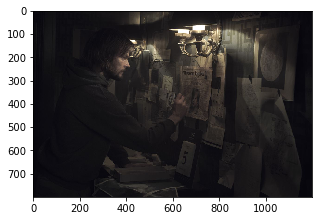

In [10]:
img_dark = plt.imread('dark.jpg')
print(img_dark.shape)
my_show(img_dark)

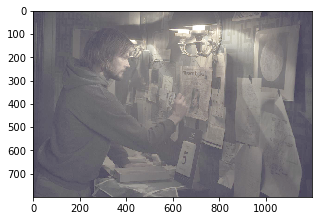

In [11]:
img_brighter = adjust_gamma(img_dark,3)
my_show(img_brighter)

## histogram equalization 直方图均衡

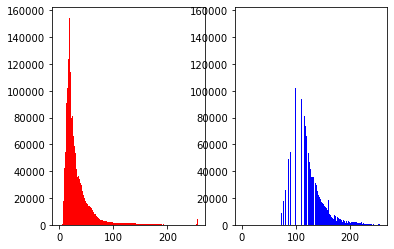

In [12]:
plt.subplot(121)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(122)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.show()

## YUV色彩空间的Y进行直方图均衡来调亮图片
用Y通道是因为Y通道就是专门表示亮度的通道，而UV是色度

HSV则是色相Hue, 饱和度Saturation以及色调Value，这个通道主要用来调色

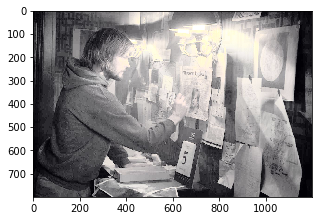

In [13]:
img_yuv = cv2.cvtColor(img_dark,cv2.COLOR_RGB2YUV)
img_yuv[:,:,0].shape  
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])  ##提取Y通道并进行处理
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
my_show(img_output)

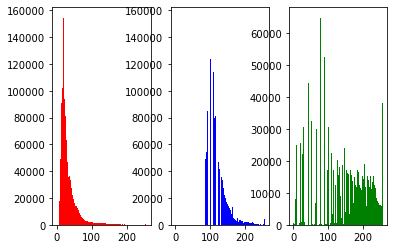

In [14]:
plt.subplot(131)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(132)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.subplot(133)
plt.hist(img_output.flatten(),256,[0,256],color='g')
plt.show()

## Transform
### perspective transform

In [15]:
pts1 = np.float32([[0,0],[0,500],[500,0],[500,500]])
pts2 = np.float32([[3,3],[23,484],[232,12],[400,380]]) 

M = cv2.getPerspectiveTransform(pts1,pts2)
img_warp = cv2.warpPerspective(img_ori,M,(img_ori.shape[0],img_ori.shape[1]))

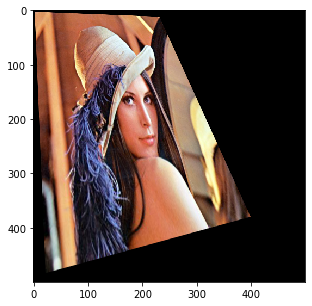

In [16]:
my_show(img_warp)

## 2. Please answer some questions about our course. We do appreciate your help.

2.1  What do you want to get in this course? 

Answer: Learn classic algorithoms of CV and get some projects experiences, which help me find a related job in the industry. I just graduated from the university and looking for a job now.

2.2 What problems do you want to solve?

Answer: Not very specific yet.

2.3 What advantages do you have to accomplish your goal?

Answer: Math and programming ability.

2.4 What disadvantages you need to overcome to accomplish your goal?

Answer: Do Not have enough time to get a satisfying job in the spring recruitment.

2.5 How will you plan to study in this course? 

Answer: Finish the assignment on time and learn to take notes and summarize. Try to do some projects including Kaggle.

## 3. 完成以下编程练习
Please combine **image crop, color shift, rotation and perspective transform** together to complete a data augmentation script.
   Your code need to be completed in Python/C++ in .py or .cpp file with comments and readme file to indicate how to use.

In [27]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

def image_crop(img,row_u,row_d,col_l,col_r): # 4 parameters. Input up,down,left,right boundaries
    return img[row_u:row_d,col_l:col_r,:]

def color_shift(img,b,r,flag):# cooler: flag==0 warmer: flag==1
    R,G,B = cv2.split(img)
    if flag == 0:     ## cooler
        b_lim = 255 - b
        B[B>b_lim] = 255
        B[B<=b_lim] = (B[B<=b_lim] + b).astype(img.dtype)  
    
        r_lim = r
        R[R<r_lim] = 0
        R[R>=r_lim] = (R[R>=r_lim] - r).astype(img.dtype)
    else:             ## warmer
        r_lim = 255 - r
        R[R>r_lim] = 255
        R[R<=r_lim] = (R[R<=r_lim] + r).astype(img.dtype) 
        
        b_lim = b
        B[B<b_lim] = 0
        B[B>=b_lim] = (B[B>=b_lim] - b).astype(img.dtype)
    return cv2.merge((R,G,B))

def rotation(img,center,angle,scale):
    M = cv2.getRotationMatrix2D(center,angle,scale)
    img_rotate = cv2.warpAffine(img,M,(img.shape[0],img.shape[1]))
    return img_rotate
    

def perspective_transform(img,pts1,pts2): 
    M = cv2.getPerspectiveTransform(pts1,pts2)
    img_warp = cv2.warpPerspective(img,M,(img.shape[0],img.shape[1]))
    return img_warp

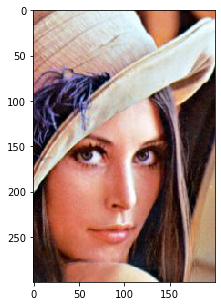

In [18]:
#test image crop
crop = image_crop(img_ori,100,400,200,400)
my_show(crop)

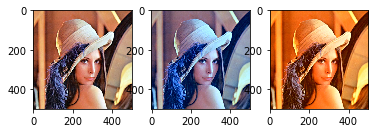

In [19]:
## test color_shift
cool = color_shift(img_ori,50,50,0)
warm = color_shift(img_ori,50,50,1)

plt.subplot(131)
plt.imshow(img_ori)
plt.subplot(132)
plt.imshow(cool)
plt.subplot(133)
plt.imshow(warm)
plt.show()

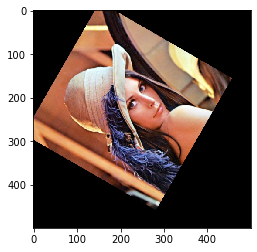

In [46]:
## test rotation
rot = rotation(img_ori,(200,250),60,0.7)
plt.imshow(rot)
plt.show()

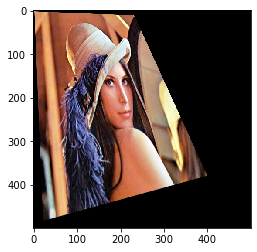

In [26]:
## test perspective transform

pts1 = np.float32([[0,0],[0,500],[500,0],[500,500]])
pts2 = np.float32([[3,3],[23,484],[232,12],[400,380]]) 

warp = perspective_transform(img_ori,pts1,pts2)
plt.imshow(warp)
plt.show()

## Optional
## photo backgroud change

In [49]:
def bgB2Rchange(portrait):   # Turn blue background to red
    rows,cols,channels = portrait.shape
    HSV=cv2.cvtColor(portrait,cv2.COLOR_RGB2HSV) # turn ro HSV channel
    lower_blue=np.array([78,43,46])  # Hmin Smin Vmin   
    upper_blue=np.array([110,255,255])  #Hmax Smax Vmax
    mask = cv2.inRange(HSV, lower_blue, upper_blue)  ## the value is set 255 when the value is in the range
    # erode and dilate 
    erode=cv2.erode(mask,None,iterations=1)
    #plt.imshow(erode,cmap='gray')
    dilate=cv2.dilate(erode,None,iterations=1)
    # traverse and replace
    for i in range(rows):
        for j in range(cols):
            if dilate[i,j]==255:
                portrait[i,j,:]=(254,67,101) 
                # replace，RGB channel. (254,67,101) is a softer red. Pure red is (255,0,0).    
    return portrait

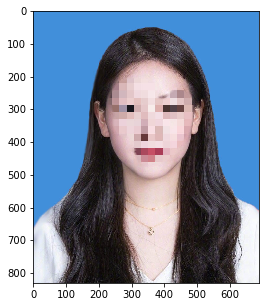

In [50]:
portrait_ori = plt.imread('portrait1.jpg').copy()  #读取图片 加copy是因为不加numpy不让修改TT
my_show(portrait_ori)
#portrait_ori.flags.writeable = True

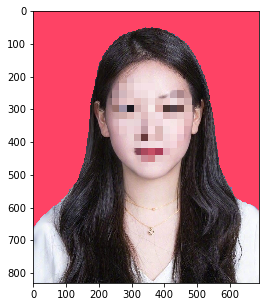

In [51]:
portrait_new = bgB2Rchange(portrait_ori)
my_show(portrait_new)